In [2]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
import numpy as np
import scipy as sp 
import matplotlib as plt 
import seaborn as sns 


In [9]:
chronic_disease=pd.read_csv("chronic disease.csv")
print(chronic_disease.head())


   age   bp     sg  al  su  bgr   bu    sc  sod  pot  hemo    wc   rc  htn  \
0   58   73  1.017   1   4  104   21  2.93  130  5.3  13.4  6953  4.8  yes   
1   71   82  1.019   1   3  150   83  1.96  143  5.2   9.8  5708  5.0   no   
2   48  119  1.023   2   3  159   25  4.56  126  3.9  10.7  7472  4.6   no   
3   34  116  1.017   4   3   77  111  2.89  139  5.7  12.0  6969  4.7  yes   
4   62   99  1.011   0   4  162  126  4.26  135  4.7  10.0  7028  5.1  yes   

    dm classification  
0   no            ckd  
1   no         notckd  
2  yes         notckd  
3  yes         notckd  
4   no         notckd  


In [14]:
 print (chronic_disease.info())
chronic_disease.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             100 non-null    int64  
 1   bp              100 non-null    int64  
 2   sg              100 non-null    float64
 3   al              100 non-null    int64  
 4   su              100 non-null    int64  
 5   bgr             100 non-null    int64  
 6   bu              100 non-null    int64  
 7   sc              100 non-null    float64
 8   sod             100 non-null    int64  
 9   pot             100 non-null    float64
 10  hemo            100 non-null    float64
 11  wc              100 non-null    int64  
 12  rc              100 non-null    float64
 13  htn             100 non-null    object 
 14  dm              100 non-null    object 
 15  classification  100 non-null    object 
dtypes: float64(5), int64(8), object(3)
memory usage: 12.6+ KB
None


age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
wc                0
rc                0
htn               0
dm                0
classification    0
dtype: int64

In [15]:
print(chronic_disease.describe())


print(chronic_disease['classification'].value_counts())


              age          bp          sg          al          su         bgr  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    49.580000   89.070000    1.015420    1.880000    2.240000  137.720000   
std     18.031499   16.811645    0.005689    1.430406    1.436325   38.512514   
min     21.000000   60.000000    1.005000    0.000000    0.000000   70.000000   
25%     34.000000   74.000000    1.010000    1.000000    1.000000  105.000000   
50%     48.000000   90.000000    1.015000    2.000000    2.500000  141.500000   
75%     66.000000  101.250000    1.020250    3.000000    4.000000  174.000000   
max     79.000000  119.000000    1.025000    4.000000    4.000000  197.000000   

               bu          sc         sod         pot        hemo  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    77.240000    3.882600  133.470000    4.725000   11.391000   
std     39.231023    1.984673    5.751513    0.692729    2.1065

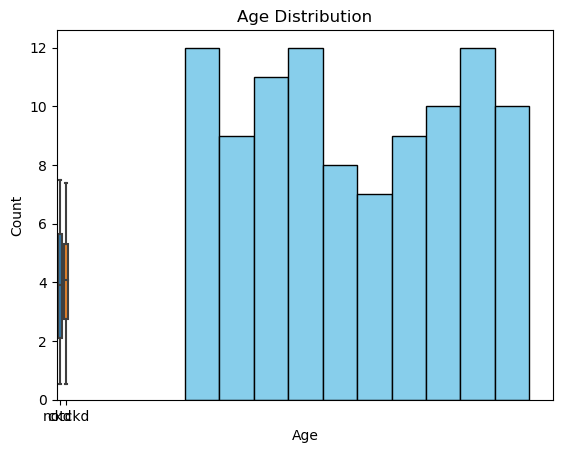

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x='classification', y='sc', data=chronic_disease)
plt.title("Serum Creatinine Levels by CKD Classification")

plt.hist(chronic_disease['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [27]:
from scipy.stats import ttest_ind

ckd = chronic_disease[chronic_disease['classification'] == 'ckd']['hemo']
non_ckd = chronic_disease[chronic_disease['classification'] == 'notckd']['hemo']
t_stat, p_val = ttest_ind(ckd.dropna(), non_ckd.dropna())



print("T-statistic",t_stat)
print("P-value",p_val)


T-statistic -0.4692388284073478
P-value 0.6399412219553038


In [28]:
import numpy as np

mean_diff = ckd.mean() - non_ckd.mean()
pooled_std = np.sqrt(((ckd.std() ** 2) + (non_ckd.std() ** 2)) / 2)
cohens_d = mean_diff / pooled_std
print("Cohen’s d:", cohens_d)

Cohen’s d: -0.09465135511239572


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = chronic_disease[['age', 'bp', 'bgr', 'sc', 'hemo']].dropna()
y = chronic_disease.loc[X.index, 'classification'].map({'ckd': 1, 'notckd': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.46      0.69      0.55        16
           1       0.17      0.07      0.10        14

    accuracy                           0.40        30
   macro avg       0.31      0.38      0.32        30
weighted avg       0.32      0.40      0.34        30

